# Assignment 2
30.04.2023

<b>Compas</b> is a proprietary algorithm/software developed by the company Northpointe used to predict
the likelihood of recidivism of criminal defendants. It uses a variety of factors, such as age and criminal
history as well as responses to a questionnaire to generate a risk score. However, critics argue that the
algorithm is based on biased data and disproportionately labels people of color as high-risk, leading to
harsher sentencing and perpetuating systemic racism in the criminal justice system. Despite ongoing
debate, Compas continues to be used in many US courts.

## Task 2

The full original dataset used by Compas is not openly available. But the non-profit organization
ProPublica was able to assemble a dataset that contains information on a large number of defendants,
notably the compas_score (a measure between 0 and 10, where 10 means highly likely to reoffend) and
the compas_class (a binary measure derived from the compas_score using a threshold of 0.4). The
score was and is used in court to make decisions about parole. Also, the data contains a binary measure
two_year_recid that shows whether the individual reoffended during a period of 2 years after the initial
case.

### Imports

In [13]:
# Imports
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Functions

In [14]:
def plot_distribution_compasscore(df, group:str):
    """ Plots distribution of compas_score"""
    plt.hist(df.compas_score, range=(1, 11), align='left', color='grey', edgecolor= 'black', alpha=1)
    plt.xticks(range(1,11))
    plt.xlabel('COMPAS Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of COMPAS Scores for "{group}"')
    plt.show()

    # print distribution of compas_score
    print(f'The distribution of COMPAS Score for "{group}" is: \n',df.compas_score.value_counts().sort_index())

In [15]:
def plot_distribution_recid(df, group:str):    
    """Plot histogram of the two_year_recid"""
    plt.hist(df.two_year_recid, range=(0,1),bins=2,  color='grey', edgecolor= 'black', alpha=1)
    plt.xticks([0,1])
    plt.xlabel('Two Year Recid')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Two Year Recid for "{group}"')
    plt.show()

    # print distribution of two_year_recid
    print(f'The Distribution of Two Year Recid for "{group}" is: \n',df.two_year_recid.value_counts())

In [16]:
def plot_percentage_risk(df, group:str):      
        """plot distribution of compas_class"""
        plt.pie(df.compas_class.value_counts(), 
                labels=['compas_class 0 - low risk', 'compas_class 1 - high risk'],
                autopct= '%1.2f%%',
                startangle=90,
                explode=[0, 0.03],
                wedgeprops={'edgecolor': 'black',
                        'linewidth': 1,
                        'antialiased': 'True'})
        plt.title(f'Percentage of COMPAS Classes for "{group}"')
        plt.axis('equal')
        plt.show()

        #print distribution of compas_class in percent
        print(f'The percentage of defendants that are classified as high risk in "{group}" is:',round(df[df.compas_class==1].shape[0] / df.shape[0] * 100, 2),'%.')

In [17]:
def plot_cm_compas(df, threshold=None):
    """Prints confusion matrix and classification report for the prediction of compas_class and two_year_recid"""    
    # confusion matrix
    y_true = df.two_year_recid
    if (threshold==None):
        y_pred = df.compas_class
    else: 
        y_pred = df.compas_score > threshold
    ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)
    ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, normalize='all')
    # classification report
    print(classification_report(y_true=y_true, y_pred=y_pred))

### Study the dataset compas.csv. In particular, answer questions such as the following.

In [18]:
# loading compas df
df = pd.read_csv("data/compas.csv", sep=';')

In [19]:
display(df.head())
display(df.shape)

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,two_year_recid,compas_score,compas_class
0,Male,69,Greater than 45,Other,0,0,0,0,F,Aggravated Assault w/Firearm,0,1,0
1,Male,34,25 - 45,African-American,0,0,0,0,F,Felony Battery w/Prior Convict,1,3,0
2,Male,24,Less than 25,African-American,0,0,1,4,F,Possession of Cocaine,1,4,0
3,Male,44,25 - 45,Other,0,0,0,0,M,Battery,0,1,0
4,Male,41,25 - 45,Caucasian,0,0,0,14,F,Possession Burglary Tools,1,6,1


(6172, 13)

In [20]:
# view numerical attributes
df.describe()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,compas_score,compas_class
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,0.059300,0.091218,0.110661,3.246436,0.455120,4.418503,0.445723
std,11.730938,0.463599,0.497872,0.470731,4.743770,0.498022,2.839463,0.497086
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
75%,42.000000,0.000000,0.000000,0.000000,4.000000,1.000000,7.000000,1.000000
max,96.000000,20.000000,13.000000,9.000000,38.000000,1.000000,10.000000,1.000000


In [21]:
# view categorical attributes
print(df.age_cat.value_counts(),"\n-----")
print(df.race.value_counts(), "\n-----")
print(df.c_charge_degree.value_counts(), "\n-----")
print(df.c_charge_desc.value_counts(), "\n-----")

age_cat
25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: count, dtype: int64 
-----
race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64 
-----
c_charge_degree
F    3970
M    2202
Name: count, dtype: int64 
-----
c_charge_desc
Battery                           1087
arrest case no charge              784
Possession of Cocaine              419
Grand Theft in the 3rd Degree      384
Driving While License Revoked      189
                                  ... 
Murder In 2nd Degree W/firearm       1
Simulation of Legal Process          1
Trans/Harm/Material to a Minor       1
Harass Witness/Victm/Informnt        1
Possession of XLR11                  1
Name: count, Length: 389, dtype: int64 
-----


### Task 2.1

#### Task 2.1.1 - How is the compas_score distributed?

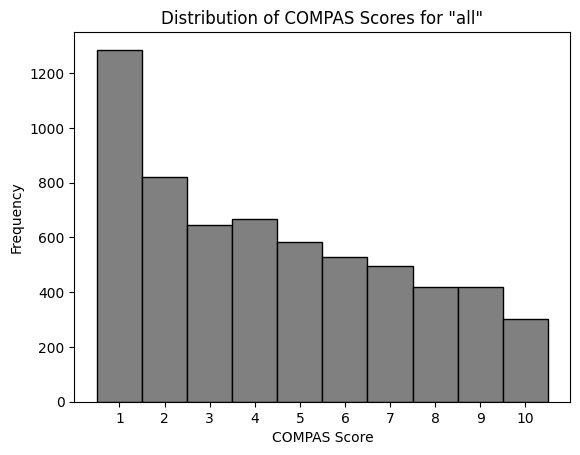

The distribution of COMPAS Score for "all" is: 
 compas_score
1     1286
2      822
3      647
4      666
5      582
6      529
7      496
8      420
9      420
10     304
Name: count, dtype: int64


In [22]:
# Plot distribution of compas_score
plot_distribution_compasscore(df, "all")

#### Task 2.1.2 - How is two_year_recid distributed

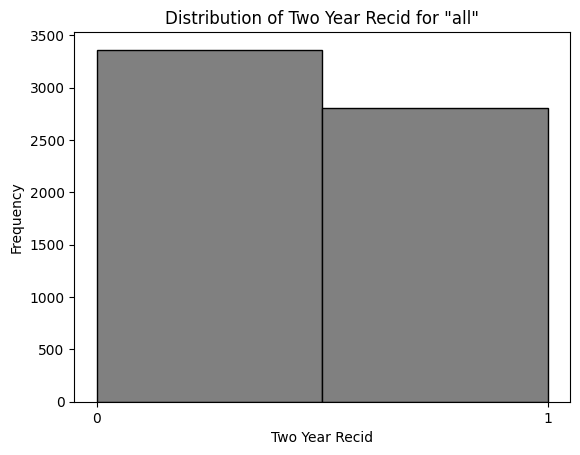

The Distribution of Two Year Recid for "all" is: 
 two_year_recid
0    3363
1    2809
Name: count, dtype: int64


In [23]:
# Plot distribution of two_year_recid
plot_distribution_recid(df, "all")

#### Task 2.1.3 - What percentage of the defendants are classified as high risk (compas_class = 1)?


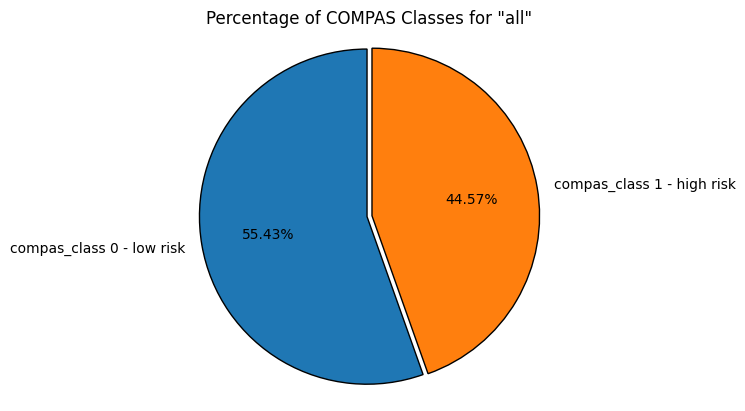

The percentage of defendants that are classified as high risk in "all" is: 44.57 %.


In [24]:
# Plot percentage of high risk classified defendants
plot_percentage_risk(df, "all")

#### Task 2.1.4 - Print a confusion matrix based on the compas_class (prediction) and two_year_recid (actual outcome) and derive typical evaluation metrics such as precision, recall, accuracy, and f1 score. How do you rate the quality of the results?

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      3363
           1       0.63      0.62      0.62      2809

    accuracy                           0.66      6172
   macro avg       0.66      0.66      0.66      6172
weighted avg       0.66      0.66      0.66      6172



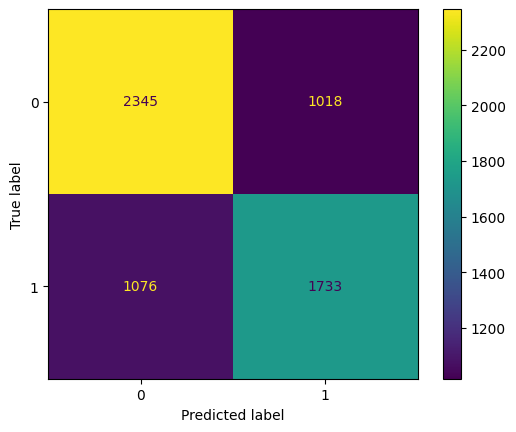

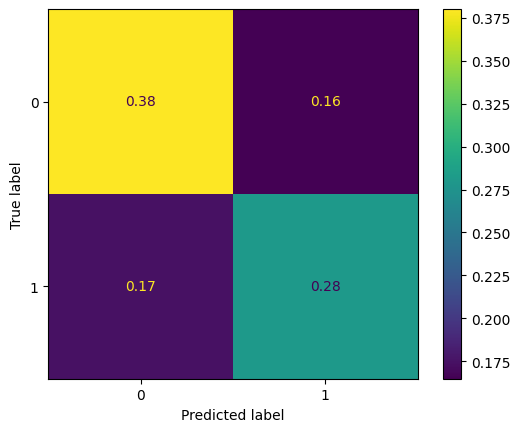

In [25]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics
plot_cm_compas(df)

##### Quality Results:
The average accuracy of the COMPAS algorithm is 66%. The f1 score for the correct prediction of COMPAS class 0 is 69%, while it is 62% for the correct prediction for class 1. From the distribution over all four prediction options, the score is 38% for class 0 and 28% for class 1. This means, the score for false-positive is 16% and for false-negative 17%. This makes a total of 33% for false predicitons.

An average score of 66% is not a very good score, considering that the COMPAS score can significantly affect a person's life. Only (at least) the values for the mispredictions are balanced, so the chances whether the misprediction is a threat for a person (the falsely accused) or for the society (because it has to live with dangerous people) are nearly equal.

#### Task 2.1.5 - How does the confusion matrix and the evaluation metrics change if you increase the classification threshold to 6. Describe the tradeoff that needs to be made when deciding on such threshold.

              precision    recall  f1-score   support

           0       0.63      0.85      0.73      3363
           1       0.70      0.41      0.51      2809

    accuracy                           0.65      6172
   macro avg       0.67      0.63      0.62      6172
weighted avg       0.66      0.65      0.63      6172



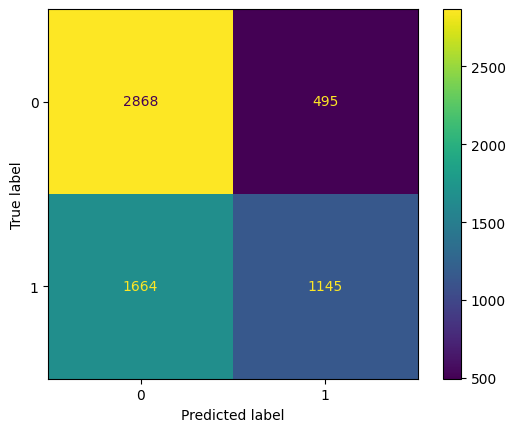

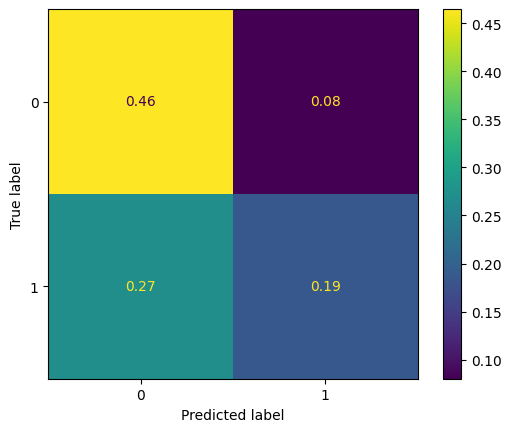

In [26]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics with threshold=6
plot_cm_compas(df, threshold=6)

The choice of threshold can have a significant impact on the performance of a classification model. If the threshold is set too high, the model may miss some positive cases, resulting in a high false negative rate. If the threshold is set too low, the model may classify too many cases as positive, resulting in a high false positive rate. Therefore, the choice of threshold should be based on the specific requirements of the problem and the trade-off between precision and recall.

In COMPAS, the true-negative rating increases significantly to 46%, but the true-positive rating drops to only 19%. For the overall accuracy, this means a drop of only one percentage point to 65%. With a threshold of 6, we do get a very good value for false positives of 8%. On the other hand, the false-negative rate rises to 27%, which is higher than the true-positive score.

### Task 2.2

#### Task 2.2.1 - Now analyse the questions from above separately for white and black defendants (or also other ethnic groups). How would you describe the differences between blacks and whites.

In [27]:
# values for different ethnic groups
display(df.race.unique())
display(df.race.value_counts())

array(['Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian',
       'Native American'], dtype=object)

race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64

In [28]:
# creating df of ethnic groups
display(f'{df.shape=}')

df_africanamerican = df.groupby('race').get_group('African-American')
display(f'{df_africanamerican.shape=}')

df_caucasian = df.groupby('race').get_group('Caucasian')
display(f'{df_caucasian.shape=}')

df_hispanic = df.groupby('race').get_group('Hispanic')
display(f'{df_hispanic.shape=}')

# grouping the three smallest groups
df['race'] = df['race'].replace({'Asian': 'Other', 'Native American': 'Other'})
df_other = df.groupby('race').get_group('Other')
display(f'{df_other.shape=}')

'df.shape=(6172, 13)'

'df_africanamerican.shape=(3175, 13)'

'df_caucasian.shape=(2103, 13)'

'df_hispanic.shape=(509, 13)'

'df_other.shape=(385, 13)'

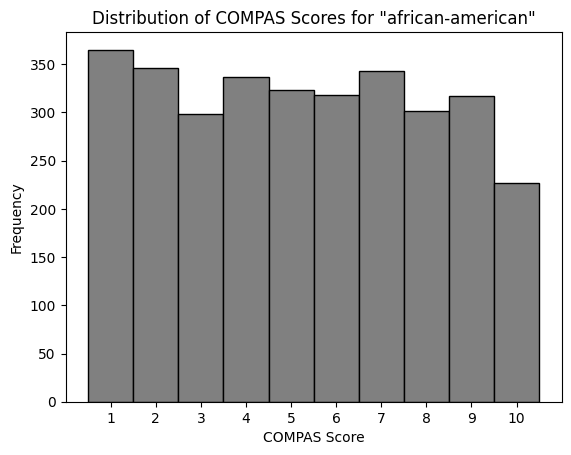

The distribution of COMPAS Score for "african-american" is: 
 compas_score
1     365
2     346
3     298
4     337
5     323
6     318
7     343
8     301
9     317
10    227
Name: count, dtype: int64


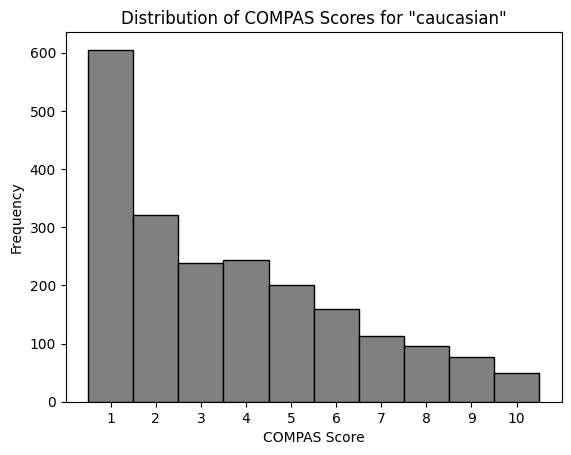

The distribution of COMPAS Score for "caucasian" is: 
 compas_score
1     605
2     321
3     238
4     243
5     200
6     160
7     113
8      96
9      77
10     50
Name: count, dtype: int64


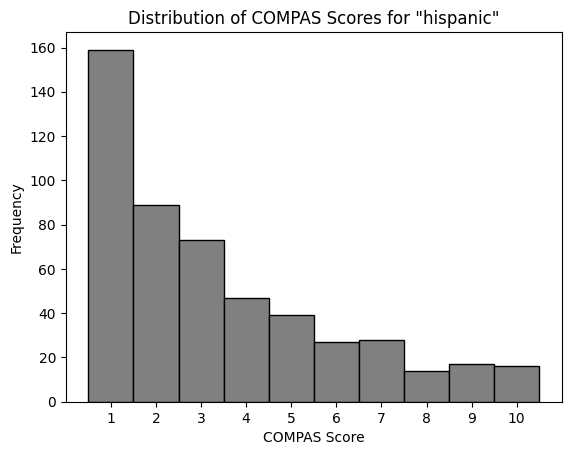

The distribution of COMPAS Score for "hispanic" is: 
 compas_score
1     159
2      89
3      73
4      47
5      39
6      27
7      28
8      14
9      17
10     16
Name: count, dtype: int64


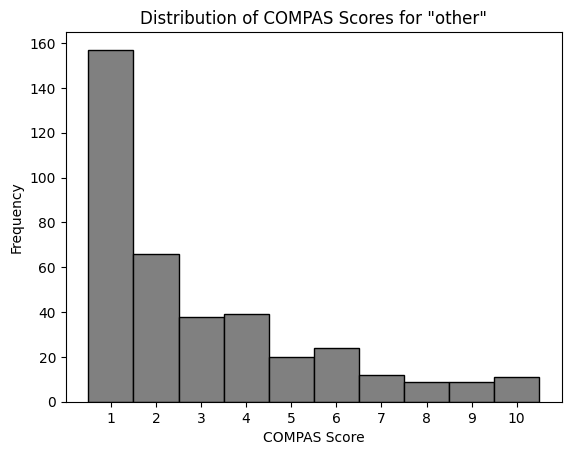

The distribution of COMPAS Score for "other" is: 
 compas_score
1     157
2      66
3      38
4      39
5      20
6      24
7      12
8       9
9       9
10     11
Name: count, dtype: int64


In [29]:
# Plot distribution of compas_score
plot_distribution_compasscore(df_africanamerican, "african-american")
plot_distribution_compasscore(df_caucasian, "caucasian")
plot_distribution_compasscore(df_hispanic, "hispanic")
plot_distribution_compasscore(df_other, "other")

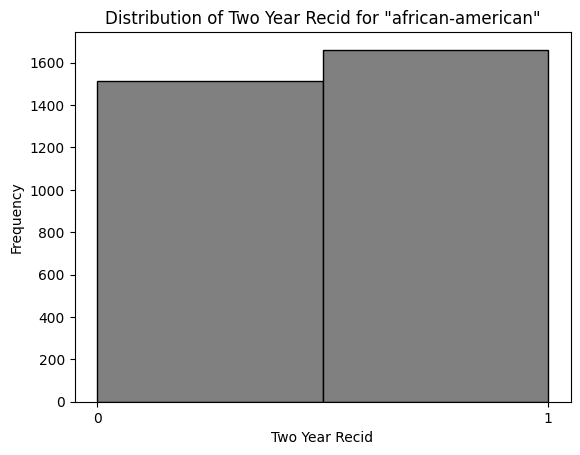

The Distribution of Two Year Recid for "african-american" is: 
 two_year_recid
1    1661
0    1514
Name: count, dtype: int64


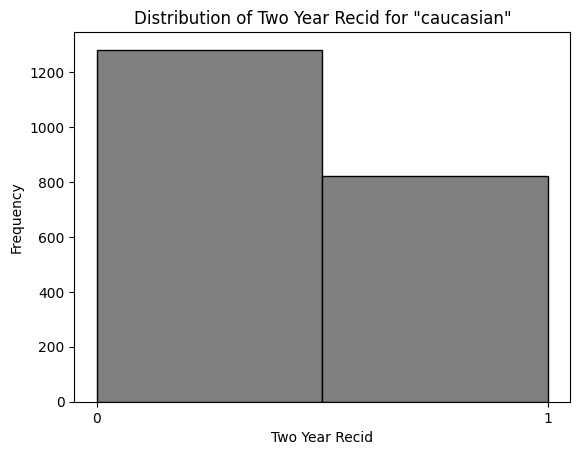

The Distribution of Two Year Recid for "caucasian" is: 
 two_year_recid
0    1281
1     822
Name: count, dtype: int64


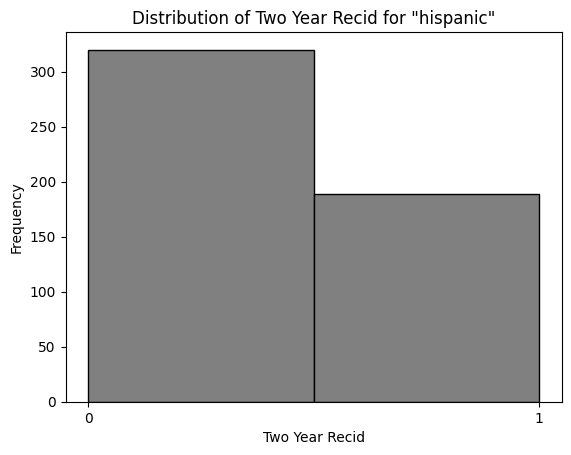

The Distribution of Two Year Recid for "hispanic" is: 
 two_year_recid
0    320
1    189
Name: count, dtype: int64


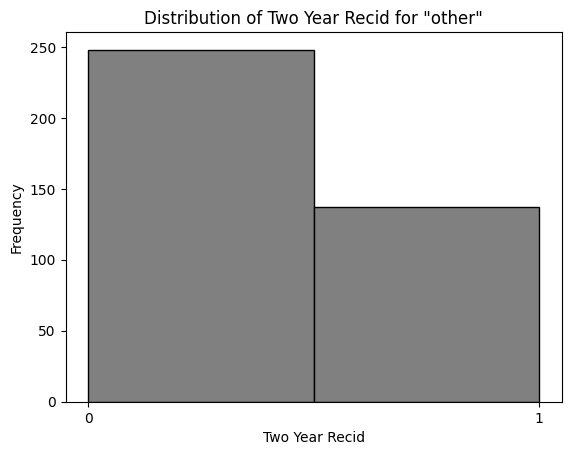

The Distribution of Two Year Recid for "other" is: 
 two_year_recid
0    248
1    137
Name: count, dtype: int64


In [30]:
# Plot distribution of two_year_recid
plot_distribution_recid(df_africanamerican, "african-american")
plot_distribution_recid(df_caucasian, "caucasian")
plot_distribution_recid(df_hispanic, "hispanic")
plot_distribution_recid(df_other, "other")

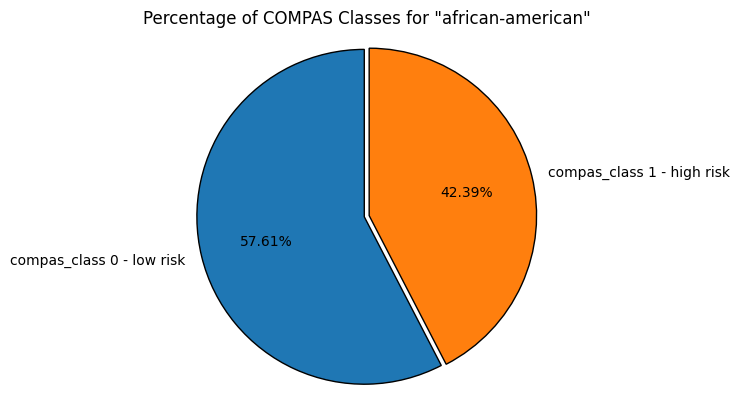

The percentage of defendants that are classified as high risk in "african-american" is: 57.61 %.


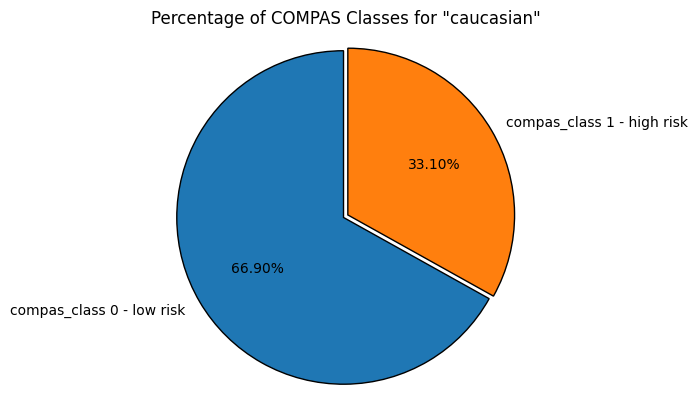

The percentage of defendants that are classified as high risk in "caucasian" is: 33.1 %.


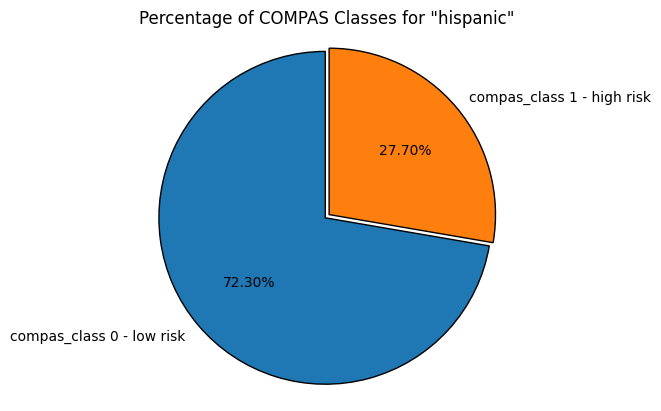

The percentage of defendants that are classified as high risk in "hispanic" is: 27.7 %.


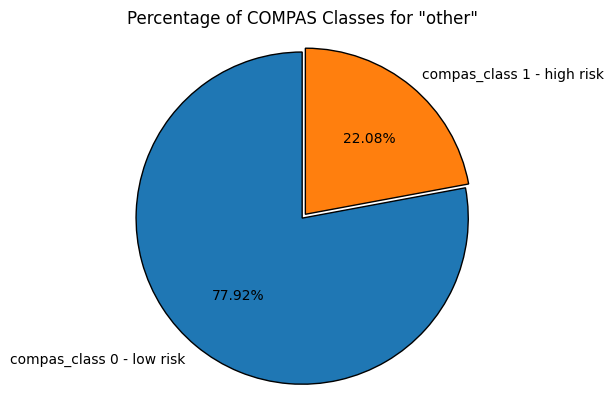

The percentage of defendants that are classified as high risk in "other" is: 22.08 %.


In [31]:
# Plot percentage of high risk classified defendants
plot_percentage_risk(df_africanamerican, "african-american")
plot_percentage_risk(df_caucasian, "caucasian")
plot_percentage_risk(df_hispanic, "hispanic")
plot_percentage_risk(df_other, "other")

              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1514
           1       0.65      0.72      0.68      1661

    accuracy                           0.65      3175
   macro avg       0.65      0.65      0.65      3175
weighted avg       0.65      0.65      0.65      3175



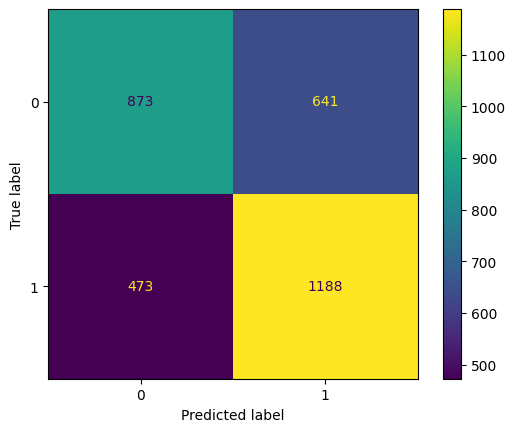

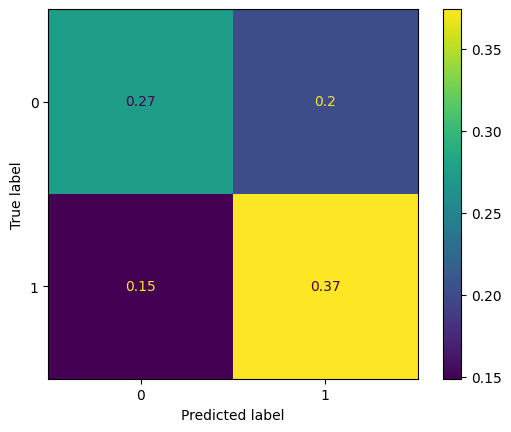

In [32]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics
plot_cm_compas(df_africanamerican)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1281
           1       0.59      0.50      0.55       822

    accuracy                           0.67      2103
   macro avg       0.65      0.64      0.64      2103
weighted avg       0.66      0.67      0.67      2103



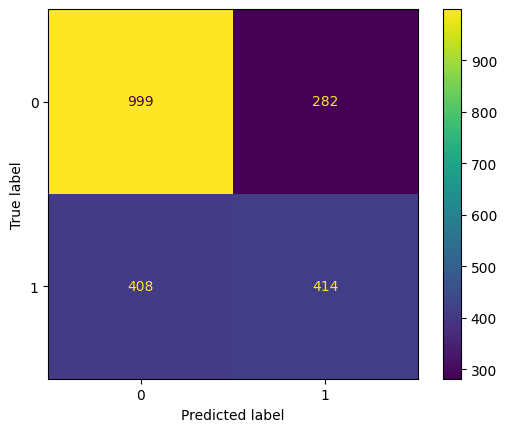

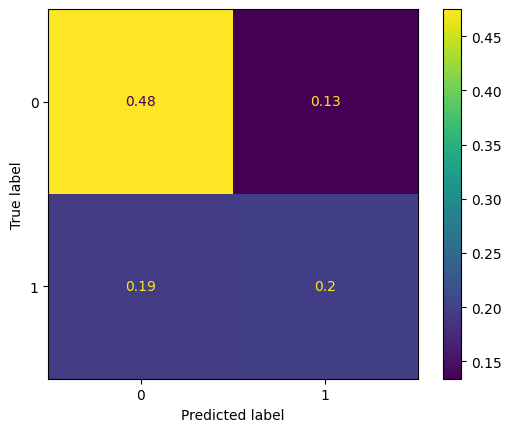

In [33]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics
plot_cm_compas(df_caucasian)

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       320
           1       0.56      0.42      0.48       189

    accuracy                           0.66       509
   macro avg       0.63      0.61      0.61       509
weighted avg       0.65      0.66      0.65       509



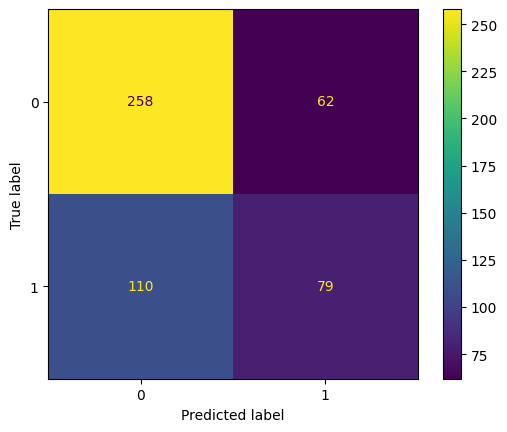

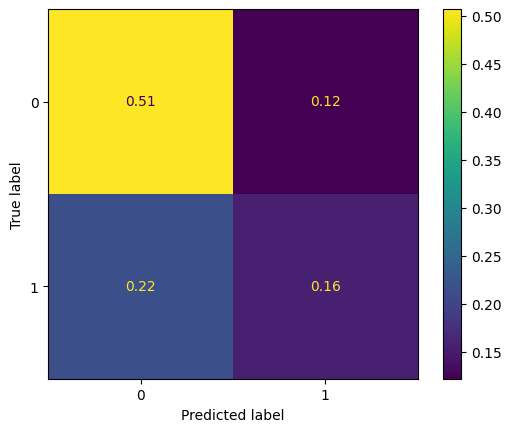

In [34]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics
plot_cm_compas(df_hispanic)

              precision    recall  f1-score   support

           0       0.72      0.87      0.78       248
           1       0.61      0.38      0.47       137

    accuracy                           0.69       385
   macro avg       0.66      0.62      0.63       385
weighted avg       0.68      0.69      0.67       385



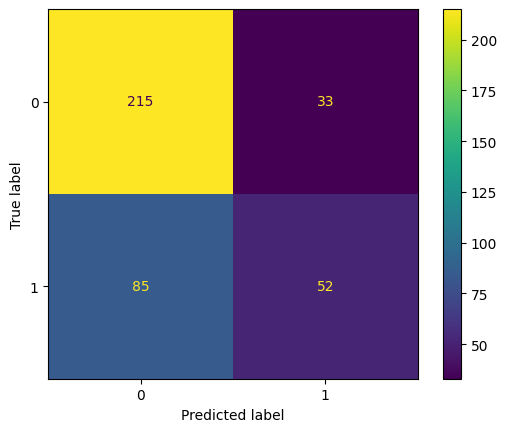

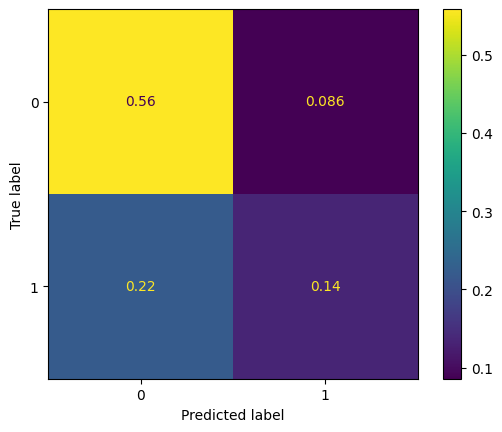

In [35]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics
plot_cm_compas(df_other)

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1514
           1       0.71      0.51      0.59      1661

    accuracy                           0.63      3175
   macro avg       0.65      0.64      0.63      3175
weighted avg       0.65      0.63      0.63      3175



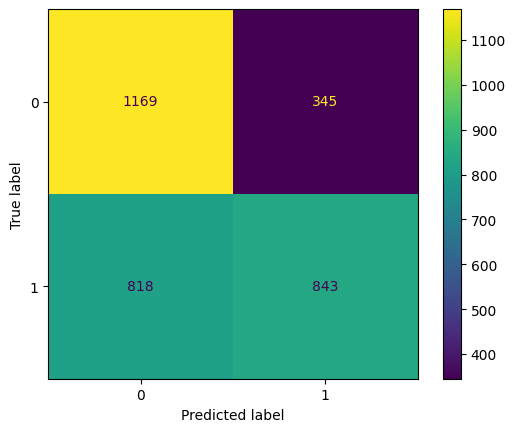

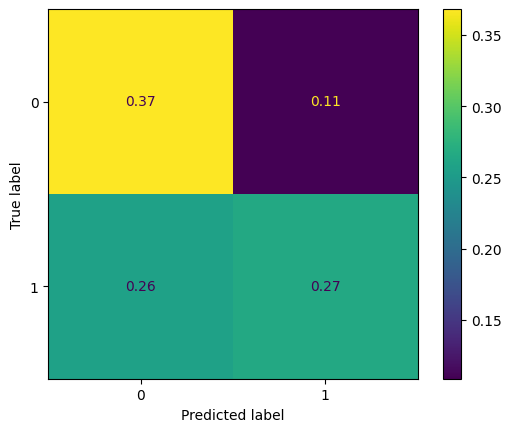

In [36]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics with threshold=6
plot_cm_compas(df_africanamerican, threshold=6)

              precision    recall  f1-score   support

           0       0.66      0.92      0.77      1281
           1       0.68      0.28      0.40       822

    accuracy                           0.67      2103
   macro avg       0.67      0.60      0.58      2103
weighted avg       0.67      0.67      0.62      2103



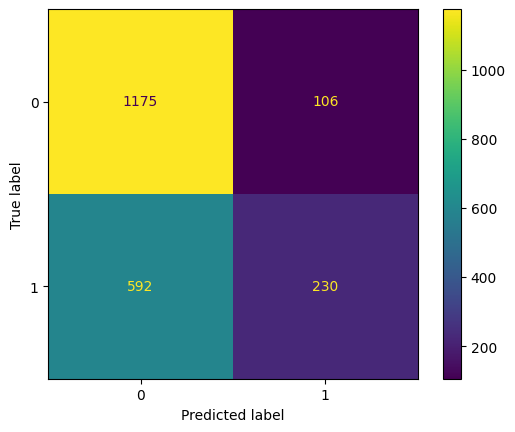

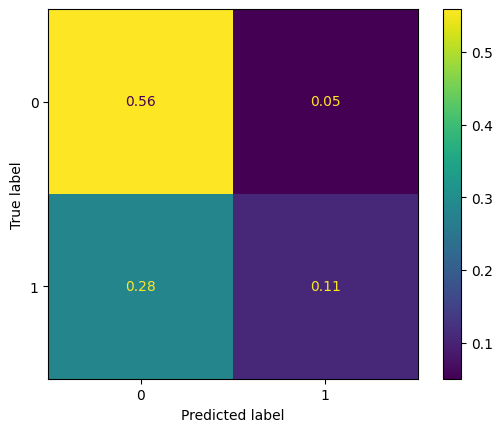

In [37]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics with threshold=6
plot_cm_compas(df_caucasian, threshold=6)

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       320
           1       0.55      0.22      0.31       189

    accuracy                           0.64       509
   macro avg       0.60      0.56      0.53       509
weighted avg       0.62      0.64      0.59       509



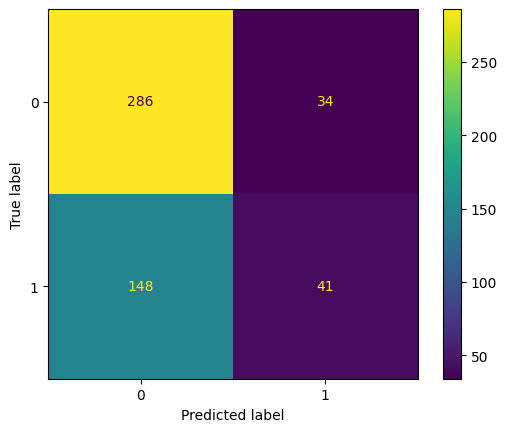

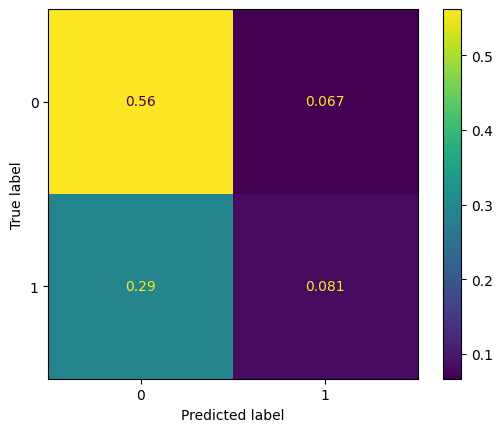

In [38]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics with threshold=6
plot_cm_compas(df_hispanic, threshold=6)

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       248
           1       0.76      0.23      0.35       137

    accuracy                           0.70       385
   macro avg       0.72      0.59      0.58       385
weighted avg       0.71      0.70      0.64       385



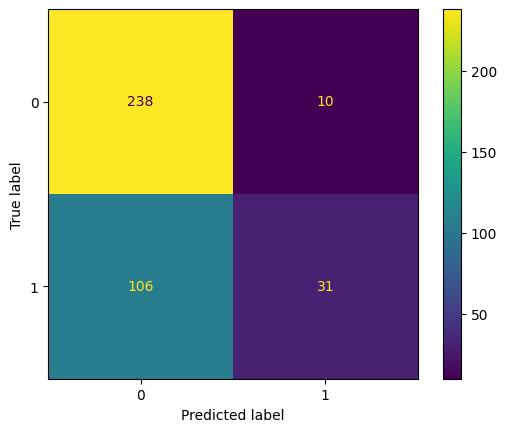

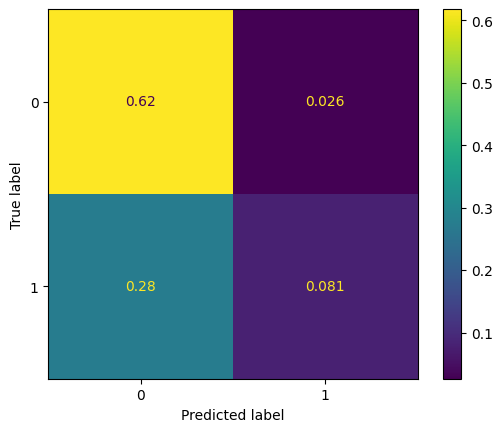

In [39]:
# Plot confusion matrix based on compas_class (prediction) and two_year_recid(actual outcome), and evaluation metrics with threshold=6
plot_cm_compas(df_other, threshold=6)

##### Differences:
With a look on the several distributions of the COMPAS data, there are some obvious differences between the different groups:
First, the african-american group is the largest group with 3175. The second largest is "caucasian" with 2103 counts. "Hispanic" has only 509 and the "other" group 385.<br>
Second, the African-American group is the only one with high values for all compas_scores. Although the compas_score of 10 is the lowest in the distribution, the difference from the other classes is not very large. This is notable when this distribution is compared to that of the other three groups. For the other three groups, the distributions look roughly similar, with by far the highest value on compas_score 1 and a large difference from compas_score 10, the lowest value. The values in between are roughly distributed in such a way that the values decrease as the compas_score increases. In addition, the African American group is the only one with a higher actual two-year recidivism score (1). It is understandable that this group also has the highest percentage for compas_class 1 (42.39%). The second group is "Caucasian" with 33.10%, the other two groups are lower. <br>
Third, the confusion matrices. All groups have almost the same accuracy of 65-69%. Strikingly, three groups have the highest accuracy on the true-negative score, while african-americans are the only group with the highest score on the true-positive score. The same is true for the lowest score. african-americans are the only group with the lowest score on false-negative, while the other groups have the lowest score on false-positive. This means that individuals from the african-american group are most likely to be classified as high-risk, even if the prediction is false. The opposite is true for the other groups. In fact, it is almost as if more true high-risk cases are classified as low-risk cases in these three groups than the actual prediction for true high-risk cases is true. With a threshold of 6 this changes and all groups have their highest score on true negative and their lowest on false positive.


#### Task 2.2.2 - Do you perceive the predictions as discriminatory? Are there arguments against such claim?

It appears that the predictions of the COMPAS algorithm disadvantage African Americans. They score highest on all crime-specific characteristics. It is interesting to note that this discrimination is directed only against this one non-white ethnic group, but not against Hispanics or the "other" group. This could be an argument against racial discrimination by the COMPAS algorithm. On the other hand, however, it appears to be a discriminatory algorithm that disadvantages black defendants in particular. 
The conclusion that the data might be representative and reflect reality should be treated with extreme caution and can only be drawn if it is completely open what data was used to train the algorithm.